In [1]:
import numpy as np
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU, Conv2D, Conv1D, MaxPooling2D,Dropout,UpSampling2D,UpSampling3D,concatenate,Conv2DTranspose,Add
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from model import model
import glob
from PIL import Image
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split

In [4]:
base_path = "C:/Users/s4601130/ISIC2018_Task1-2_Training_Data"
x_files = glob.glob(base_path + "/ISIC2018_Task1-2_Training_Input_x2/*.jpg")
y_files = glob.glob(base_path + "/ISIC2018_Task1_Training_GroundTruth_x2/*.png")
x_files.sort()
y_files.sort()
assert(len(x_files) == len(y_files))

    
    


In [5]:
x=[]
y=[]
for i in range(len(x_files)):
    x_tmp = Image.open(x_files[i])
    y_tmp = Image.open(y_files[i])
    
    x_tmp = np.array(x_tmp.resize((256,256), Image.ANTIALIAS))
    y_tmp = np.array(y_tmp.resize((256,256), Image.ANTIALIAS))
    
    x.append(x_tmp)
    y.append(y_tmp)
    
x = np.array(x)
y = np.expand_dims(np.array(y), -1)


print(x.shape)
print(y.shape)
#print(np.unique(y))


(2594, 256, 256, 3)
(2594, 256, 256, 1)


In [6]:
y=y/255.0
y= np.around(y)




In [6]:
print(np.unique(y))


[0. 1.]


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [8]:
model = model()
model.compile(loss='binary_crossentropy',
optimizer=tensorflow.keras.optimizers.Adam(learning_rate=5e-4),
metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [10]:
print(y_train.shape)
print(y_val.shape)

(1556, 256, 256, 1)
(519, 256, 256, 1)


In [9]:
moel_result = model.fit(x_train, y_train, batch_size=8, epochs=40, validation_data = (x_val, y_val))

Train on 1556 samples, validate on 519 samples
Epoch 1/40
1556/1556 [==============================] - 22s 14ms/sample - loss: 0.8276 - accuracy: 0.7787 - val_loss: 0.3402 - val_accuracy: 0.8870
Epoch 2/40
1556/1556 [==============================] - 15s 10ms/sample - loss: 0.3036 - accuracy: 0.8929 - val_loss: 0.2661 - val_accuracy: 0.9061
Epoch 3/40
1556/1556 [==============================] - 15s 10ms/sample - loss: 0.2807 - accuracy: 0.8989 - val_loss: 0.2352 - val_accuracy: 0.9132
Epoch 4/40
1556/1556 [==============================] - 15s 10ms/sample - loss: 0.2464 - accuracy: 0.9100 - val_loss: 0.2402 - val_accuracy: 0.9167
Epoch 5/40
1556/1556 [==============================] - 15s 10ms/sample - loss: 0.2261 - accuracy: 0.9158 - val_loss: 0.2026 - val_accuracy: 0.9239
Epoch 6/40
1556/1556 [==============================] - 15s 10ms/sample - loss: 0.2146 - accuracy: 0.9187 - val_loss: 0.2234 - val_accuracy: 0.9181
Epoch 7/40
1556/1556 [==============================] - 15s 10ms/

In [10]:
y_pred = model.predict(x_test)

In [24]:
print(y_pred.shape)
print(y_test.shape)

(519, 256, 256, 1)
(519, 256, 256, 1)


In [11]:
scores = model.evaluate(x_test,y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 94.64%


In [12]:
def dice_score(y_true, y_pred):
    

    intersection = tensorflow.reduce_sum(y_true*y_pred, axis= [1,2])

    denominator = tensorflow.reduce_sum(y_true +y_pred, axis= [1,2])
    
    dice_score= tensorflow.reduce_mean((2.0*intersection)/(denominator+ 1e-6), axis=0)
    return dice_score
res = dice_score(y_test, y_pred)
print(res)

tf.Tensor([0.78278332], shape=(1,), dtype=float64)


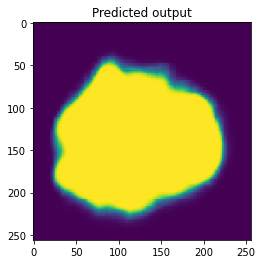

In [26]:
plt.title("Predicted output")
plt.imshow(y_pred[10])

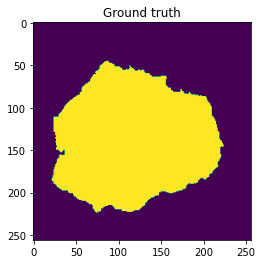

In [27]:
plt.title("Ground truth")
plt.imshow(y_test[10])

In [15]:
import matplotlib
import matplotlib.pyplot as plt

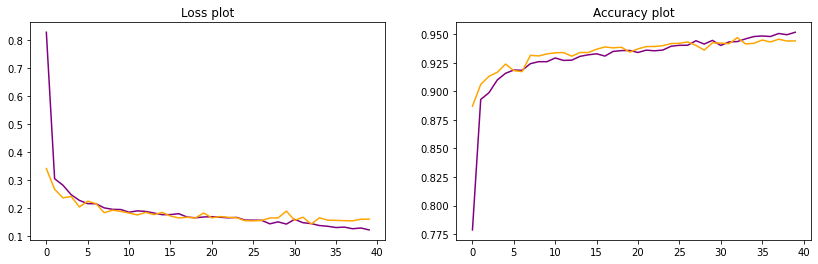

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].set_title("Loss plot")
axs[0].plot(moel_result.history['loss'], color='purple', label='train')
axs[0].plot(moel_result.history['val_loss'], color='orange', label='test')
axs[1].set_title("Accuracy plot")
axs[1].plot(moel_result.history['accuracy'], color='purple', label='train')
axs[1].plot(moel_result.history['val_accuracy'], color='orange', label='test')